In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

**Load environment variables from .env file**

In [28]:
load_dotenv('../.venv/.env')

True

**Retrieve database connection details from environment variables**

In [48]:
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')
table_name = 'xdr_data'

**Create the connection string**

In [49]:
connection_string = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_string)

**Query the data**

In [50]:
query = 'SELECT * FROM xdr_data'
data = pd.read_sql(query, engine)

**Display the data**

In [51]:
print(data.head())

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [52]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

**Missing Values**

In [53]:
missing_values = data.isnull().sum()
print(missing_values)

Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps (%)             

**Handling Missing Values**

In [54]:
numeric_columns = data.select_dtypes(include=['float64']).columns
text_columns = data.select_dtypes(include=['object']).columns

data_cleaned = data.copy()

data_cleaned[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data_cleaned[text_columns] = data[text_columns].fillna('N/A')

# Remove rows with empty 'MSISDN/Number'
data_cleaned = data_cleaned.dropna(subset=['MSISDN/Number'])

display(data_cleaned)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0000,4/25/2019 14:35,662.00000,1.823652e+06,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,3.674974e+07,3.088796e+08
1,1.311448e+19,4/9/2019 13:04,235.0000,4/25/2019 8:15,606.00000,1.365104e+06,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,5.380039e+07,6.533850e+08
2,1.311448e+19,4/9/2019 17:42,1.0000,4/25/2019 11:58,652.00000,1.361762e+06,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,2.788364e+07,2.798073e+08
3,1.311448e+19,4/10/2019 0:31,486.0000,4/25/2019 7:36,171.00000,1.321509e+06,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,4.332422e+07,8.460285e+08
4,1.311448e+19,4/12/2019 20:10,565.0000,4/25/2019 10:40,954.00000,1.089009e+06,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,3.854281e+07,5.691386e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0000,4/30/2019 6:02,214.00000,8.123000e+04,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,...,1.619167e+07,1.176343e+07,1.788370e+07,1.967816e+07,5.266097e+08,9.197207e+06,3.264510e+06,1.348742e+07,5.762885e+07,5.741753e+08
149997,7.349883e+18,4/29/2019 7:28,483.0000,4/30/2019 10:41,187.00000,9.797000e+04,2.082019e+14,3.366345e+10,3.566051e+13,D10223C,...,1.387723e+07,8.288284e+06,1.935015e+07,2.129315e+07,6.268931e+08,4.735033e+06,7.121804e+08,2.457758e+06,3.913508e+07,6.666488e+08
149998,1.311448e+19,4/29/2019 7:28,283.0000,4/30/2019 10:46,810.00000,9.824900e+04,2.082017e+14,3.362189e+10,3.572121e+13,T51102A,...,2.266051e+07,1.855903e+06,9.963942e+06,5.065760e+06,5.535395e+08,1.339432e+07,1.211009e+08,1.131473e+07,3.491222e+07,5.927864e+08
149999,1.311448e+19,4/29/2019 7:28,696.0000,4/30/2019 10:40,327.00000,9.791000e+04,2.082021e+14,3.361962e+10,8.618620e+13,L88342B,...,8.817106e+06,8.305402e+06,3.322253e+06,1.317259e+07,3.525370e+08,2.529475e+06,8.147131e+08,1.406930e+06,2.962610e+07,3.718959e+08


In [55]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

**Add the cleaned data to xdr_data**

In [56]:
data_cleaned.to_sql(table_name, engine, if_exists='replace', index=False)

313

In [57]:
query = 'SELECT * FROM xdr_data'
data = pd.read_sql(query, engine)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

**Task 1**

**Identify the top 10 handsets used by the customers**

In [58]:
top_10_handsets = data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
print(top_10_handsets)

Top 10 Handsets:
Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


**Identify the top 3 handset manufacturers**

In [59]:
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Handset Manufacturers:")
print(top_3_manufacturers)

Top 3 Handset Manufacturers:
Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


**Identify the top 5 handsets per top 3 handset manufacturer**

In [60]:
for manufacturer in top_3_manufacturers.index:
    top_5_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for Manufacturer {manufacturer}:")
    print(top_5_handsets)


Top 5 Handsets for Manufacturer Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 Handsets for Manufacturer Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 Handsets for Manufacturer Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64



//

**Task 1.1**

**Group by each user (assuming 'MSISDN/Number' is the identifier for users)**

In [61]:
# Define DL and UL columns
dl_columns = [
    'Social Media DL (Bytes)', 
    'Google DL (Bytes)', 
    'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 
    'Netflix DL (Bytes)', 
    'Gaming DL (Bytes)', 
    'Other DL (Bytes)'
]

ul_columns = [
    'Social Media UL (Bytes)', 
    'Google UL (Bytes)', 
    'Email UL (Bytes)', 
    'Youtube UL (Bytes)', 
    'Netflix UL (Bytes)', 
    'Gaming UL (Bytes)', 
    'Other UL (Bytes)'
]

# Group by each user using 'MSISDN/Number' as the identifier
user_overview = data.groupby('MSISDN/Number').agg(
    xdr_sessions=('Dur. (ms)', 'count'),  # Number of xDR sessions
    total_duration=('Dur. (ms)', 'sum'),  # Total session duration
    **{col: (col, 'sum') for col in dl_columns},  # Sum each DL column
    **{col: (col, 'sum') for col in ul_columns}   # Sum each UL column
).reset_index()

# Sum the DL and UL columns across each group
user_overview['total_dl_data'] = user_overview[dl_columns].sum(axis=1)
user_overview['total_ul_data'] = user_overview[ul_columns].sum(axis=1)

# Calculate total data volume
user_overview['total_data_volume'] = user_overview[dl_columns].sum(axis=1) + user_overview[ul_columns].sum(axis=1)

# Drop the intermediary columns
user_overview = user_overview.drop(columns=dl_columns + ul_columns)

print(user_overview.head())

   MSISDN/Number  xdr_sessions  total_duration  total_dl_data  total_ul_data  \
0   3.360100e+10             1        116720.0   1.219734e+09     36053108.0   
1   3.360100e+10             1        181230.0   4.003129e+08     36104459.0   
2   3.360100e+10             1        134969.0   1.051746e+09     39306820.0   
3   3.360101e+10             1         49878.0   4.272412e+08     20327526.0   
4   3.360101e+10             2         37104.0   2.140774e+09     94280527.0   

   total_data_volume  
0       1.255788e+09  
1       4.364173e+08  
2       1.091053e+09  
3       4.475687e+08  
4       2.235055e+09  


**Task 1.2**

**Exploratory Data Analysis (EDA)**

**Describe Variables**

In [64]:
# Describe data
print(data.describe())

          Bearer Id       Start ms         End ms     Dur. (ms)          IMSI  \
count  1.500010e+05  150001.000000  150001.000000  1.500010e+05  1.500010e+05   
mean   1.013887e+19     499.188200     498.800880  1.046086e+05  2.082016e+14   
std    2.883600e+18     288.610872     288.096693  8.103735e+04  2.144722e+10   
min    6.917538e+18       0.000000       0.000000  7.142000e+03  2.040471e+14   
25%    7.349883e+18     250.000000     251.000000  5.744200e+04  2.082014e+14   
50%    7.349883e+18     499.000000     500.000000  8.639900e+04  2.082015e+14   
75%    1.304243e+19     749.000000     750.000000  1.324300e+05  2.082018e+14   
max    1.318654e+19     999.000000     999.000000  1.859336e+06  2.140743e+14   

       MSISDN/Number          IMEI  Avg RTT DL (ms)  Avg RTT UL (ms)  \
count   1.500010e+05  1.500010e+05    150001.000000    150001.000000   
mean    4.188282e+10  4.847455e+13       109.795706        17.662883   
std     2.438731e+12  2.237359e+13       559.342620   

In [65]:
# Check data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 150001 non-null  float64
 1   Start                                     150001 non-null  object 
 2   Start ms                                  150001 non-null  float64
 3   End                                       150001 non-null  object 
 4   End ms                                    150001 non-null  float64
 5   Dur. (ms)                                 150001 non-null  float64
 6   IMSI                                      150001 non-null  float64
 7   MSISDN/Number                             150001 non-null  float64
 8   IMEI                                      150001 non-null  float64
 9   Last Location Name                        150001 non-null  object 
 10  Avg RTT DL (ms)     

**Variable Transformations**

In [66]:
import pandas as pd

# Calculate total data (DL + UL)
data['total_data'] = data[
    ['Social Media DL (Bytes)', 'Google DL (Bytes)', 'Email DL (Bytes)', 
    'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)',
    'Social Media UL (Bytes)', 'Google UL (Bytes)', 'Email UL (Bytes)', 
    'Youtube UL (Bytes)', 'Netflix UL (Bytes)', 'Gaming UL (Bytes)', 'Other UL (Bytes)']
].sum(axis=1)

# Segment into deciles based on total duration, dropping duplicate bin edges
data['duration_decile'] = pd.qcut(data['Dur. (ms)'], 10, labels=False, duplicates='drop')

# Compute total data per decile class
total_data_per_decile = data.groupby('duration_decile')['total_data'].sum()

print(total_data_per_decile)

duration_decile
0    1.373154e+13
1    1.368392e+13
2    1.383479e+13
3    2.998515e+13
4    1.128968e+13
5    1.376477e+13
6    1.372354e+13
7    1.376875e+13
8    1.374856e+13
Name: total_data, dtype: float64


**Basic Metrics**

In [67]:
# Calculate mean, median, etc.
metrics = data[['Dur. (ms)', 'total_data']].agg(['mean', 'median', 'std'])
print(metrics)


            Dur. (ms)    total_data
mean    104608.560347  9.168652e+08
median   86399.000000  9.170596e+08
std      81037.351353  3.442942e+08


**Non-Graphical Univariate Analysis**

In [68]:
# Dispersion parameters
dispersion = data[['Dur. (ms)', 'total_data']].agg(['var', 'std'])
print(dispersion)

        Dur. (ms)    total_data
var  6.567052e+09  1.185385e+17
std  8.103735e+04  3.442942e+08


**Graphical Univariate Analysis**

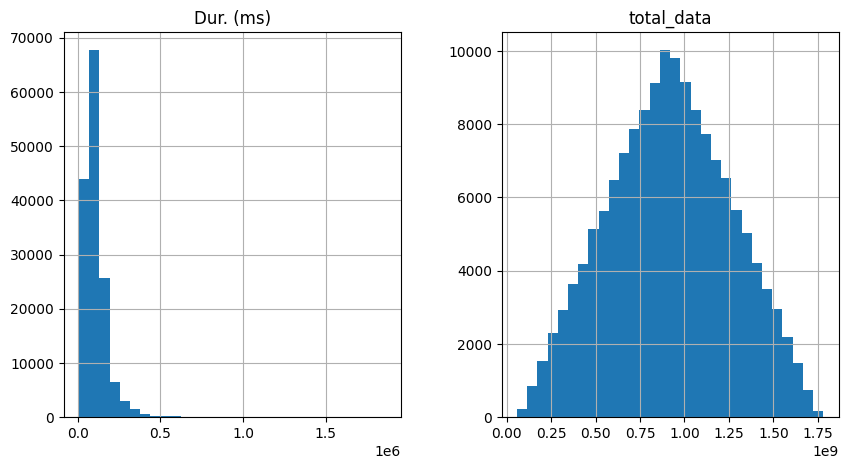

In [69]:
# Histograms
data[['Dur. (ms)', 'total_data']].hist(bins=30, figsize=(10, 5))
plt.show()

**Bivariate Analysis**

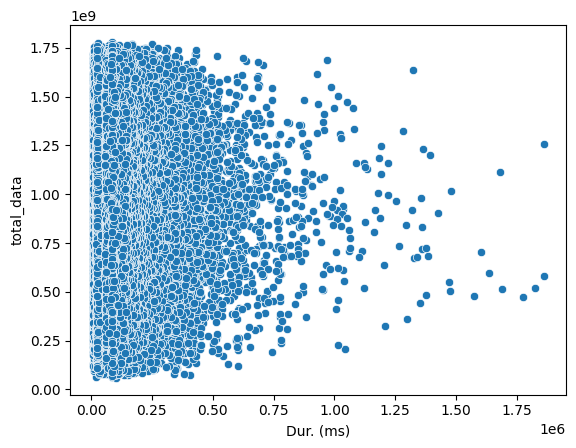

In [70]:
# Scatter plot
sns.scatterplot(x='Dur. (ms)', y='total_data', data=data)
plt.show()

**Dimensionality Reduction**

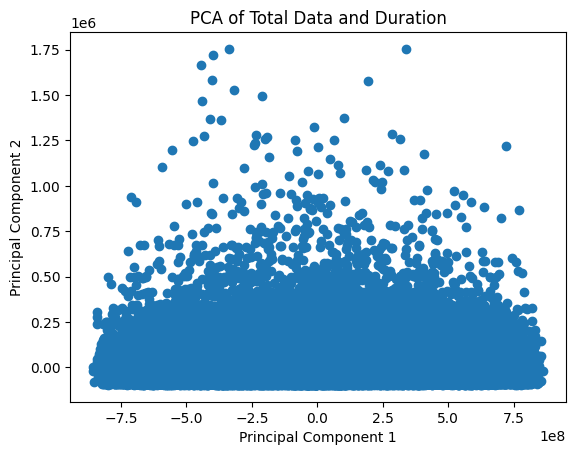

In [71]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[['total_data', 'Dur. (ms)']])
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('PCA of Total Data and Duration')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()